# Problema 2 - Linha de Produção
É basicamente o problema do caminho crítico

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [40]:
# Enumeração Primitiva
S = 0
A = 1
B = 2
C = 3
D = 4
E = 5
F = 6
G_v = 7
H = 8
I = 9
J = 10
K = 11
L = 12

In [52]:
# Criando nosso grafo ponderado
G = nx.DiGraph()
G.add_edges_from(
    [
        (S, C,     {"weight": 10}),
        (S, A,     {"weight": 8}),
        (S, D,     {"weight": 12}),
        (S, B,     {"weight": 8}),
        (C, E,     {"weight": 8}),
        (C, F,     {"weight": 11}),
        (A, E,     {"weight": 8}),
        (A, F,     {"weight": 11}),
        (A, G_v,     {"weight": 15}),
        (D, G_v,     {"weight": 15}),
        (B, L,     {"weight": 7}),
        (E, H,     {"weight": 9}),
        (F, J,     {"weight": 7}),
        (G_v, J,     {"weight": 4}),
        (H, J,     {"weight": 4}),
        (J, K,     {"weight": 6}),
        (K, L,     {"weight": 7}),
        (I, K,     {"weight": 6}),  
    ]
)

G.edges()

OutEdgeView([(0, 3), (0, 1), (0, 4), (0, 2), (3, 5), (3, 6), (1, 5), (1, 6), (1, 7), (4, 7), (2, 12), (5, 8), (6, 10), (7, 10), (8, 10), (10, 11), (11, 12), (9, 11)])

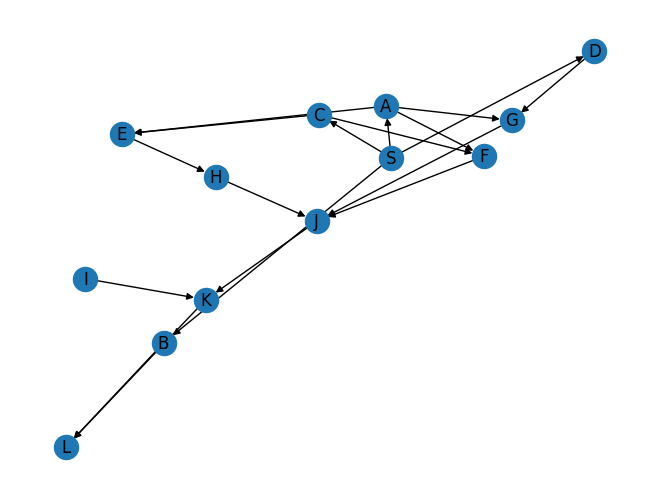

In [71]:
labels = {}
labels[S] = r"S"
labels[A] = r"A"
labels[B] = r"B"
labels[C] = r"C"
labels[D] = r"D"
labels[E] = r"E"
labels[F] = r"F"
labels[G_v] = r"G"
labels[H] = r"H"
labels[I] = r"I"
labels[J] = r"J"
labels[K] = r"K"
labels[L] = r"L"

options = {
    'node_color': 'red',
    'node_size': 200,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    'labels': labels,
}

nx.draw(G, labels=labels)

# É o problema do Caminho Crítico


In [75]:
longest_path = nx.dag_longest_path(G)

In [81]:
vertices = {
    S: "S",
    A: "A",
    B: "B",
    C: "C",
    D: "D",
    E: "E",
    F: "F",
    G_v: "G",
    H: "H",
    I: "I",
    J: "J",
    K: "K",
    L: "L",
}

for i in longest_path:
    print(f"{vertices[i]} -> ", end="")
print("FIM")

S -> D -> G -> J -> K -> L -> FIM
